***
## required library

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***
## read the data

In [2]:
# load data by using pandas command [pd.read_csv]
train = pd.read_csv('Train_set.csv')
train

,Unnamed: 0,id,Body,Label
0,4006,83044,"Subject: new jcc stuff vince , i ' m gone thr...",0.0
1,6645,36465,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0
2,13662,30041,Subject: we need your help\n dear southtrust c...,1.0
3,7706,72756,bank accountdoctyp html public wnumbercdtd htm...,1.0
4,10855,54804,Subject: dinner speaker - may 23\n vince :\n m...,0.0
...,...,...,...,...
13148,9225,68399,Subject: re : test dear vince : the email add...,0.0
13149,13123,6407,"Subject: all graphics software available , che...",1.0
13150,9845,56243,Subject: introduction of the european gas advi...,0.0
13151,10799,70202,"Subject: credit business plan hi jeff , my r...",0.0


In [3]:
# load data by using pandas command [pd.read_csv]
test = pd.read_csv('Test_set.csv')
test

,Unnamed: 0,id,Body
0,4934,22406,Subject: i ' m a changed man\n dear sir / mada...
1,8832,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,11742,59875,Subject: ngx - enron - security in place .\n h...
3,1514,40297,Subject: sitara availability\n as a precaution...
4,4431,50696,Subject: inception document for gtv ii phase i...
...,...,...,...
5633,3050,79976,Subject: are you lonely or horney ?\n 100 % fr...
5634,17161,53867,Subject: career opportunity dear mr . kaminsk...
5635,17696,50221,Subject: abb on eol\n calpine and nrg risk man...
5636,1615,64131,bad focusclick behaviourtoni nugent sender dat...


### a littel visualization before the process

Text(0.5, 1.0, 'WordCloud for train ')

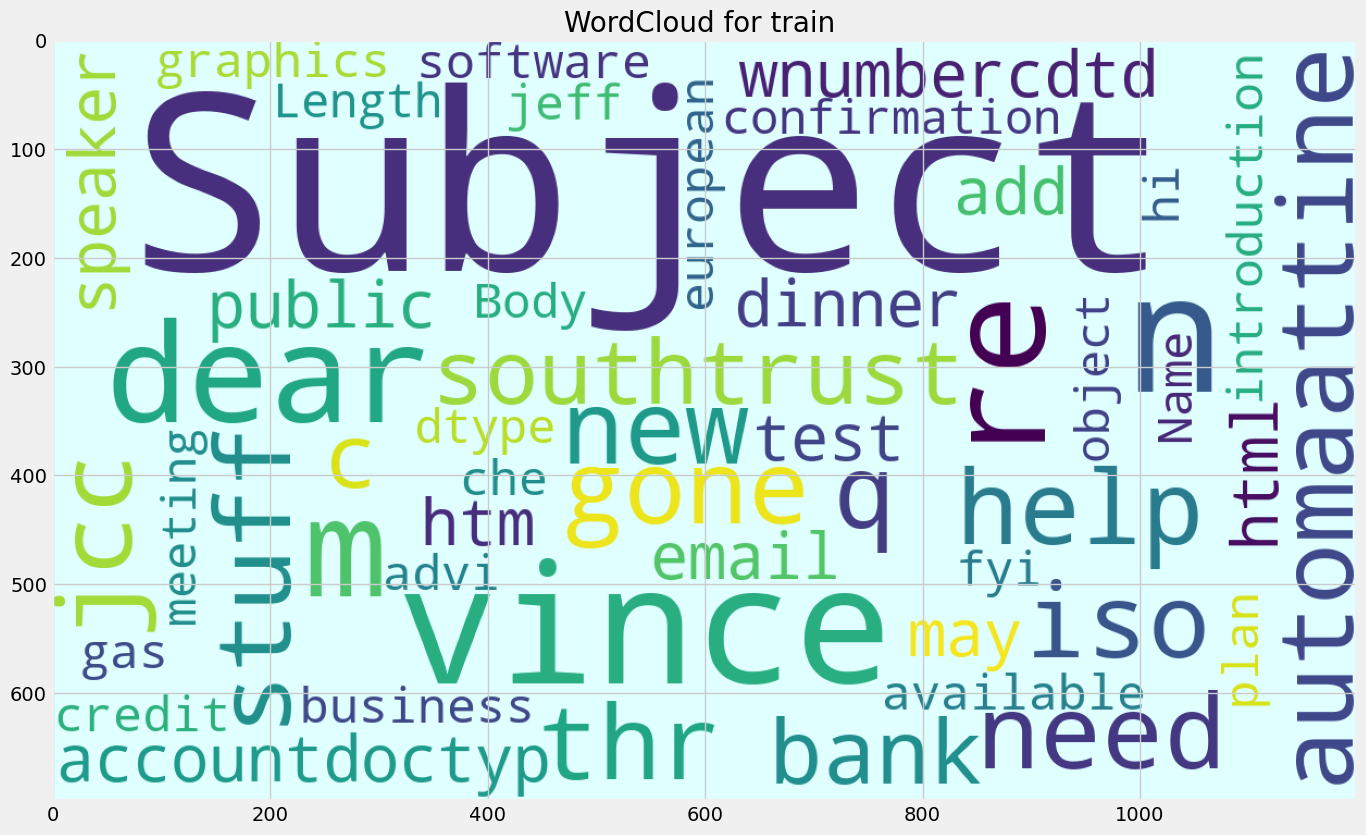

In [4]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

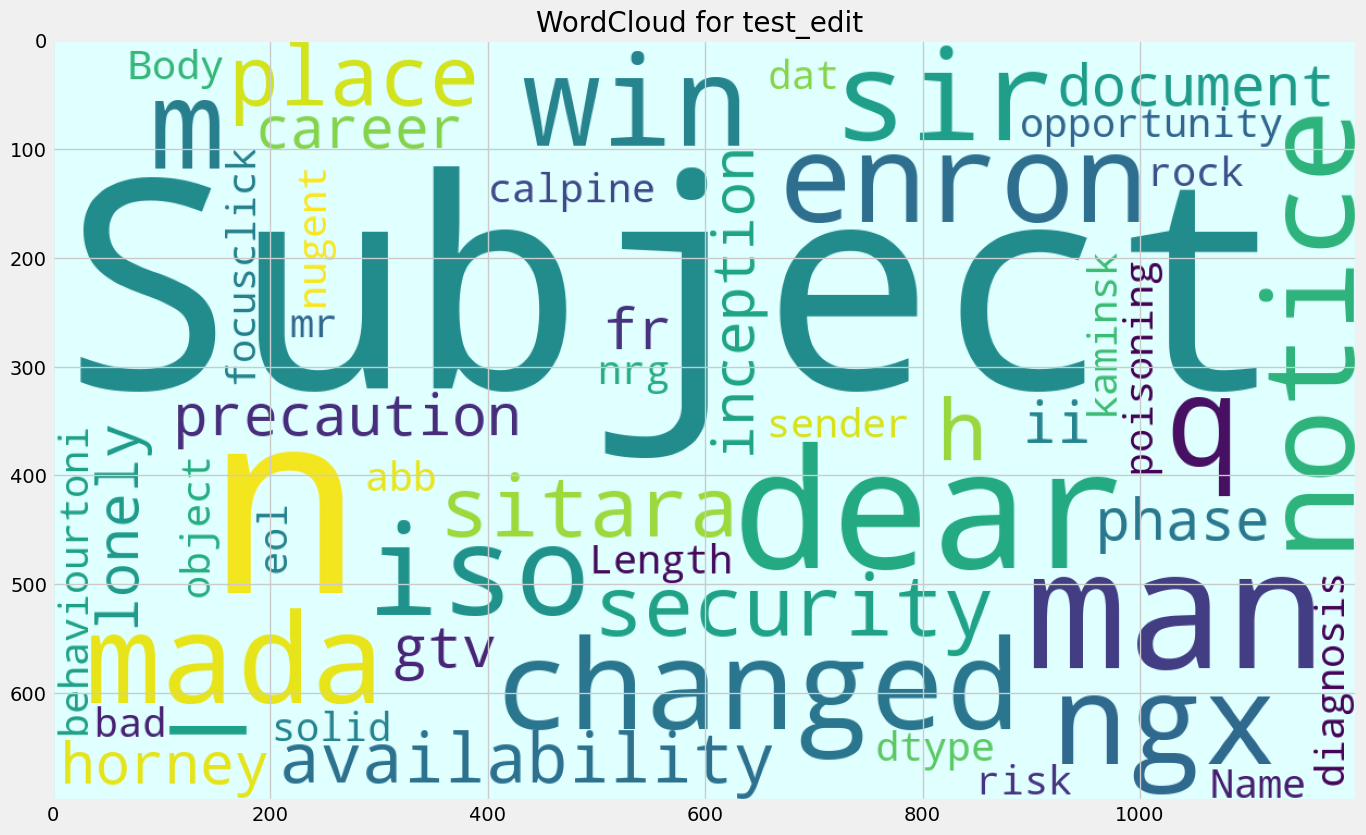

In [6]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

***
### Drop the unnecessary data

In [7]:
train = train.drop(columns=['Unnamed: 0','id'])

In [8]:
test = test.drop(columns=['Unnamed: 0'])
test

,id,Body
0,22406,Subject: i ' m a changed man\n dear sir / mada...
1,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,59875,Subject: ngx - enron - security in place .\n h...
3,40297,Subject: sitara availability\n as a precaution...
4,50696,Subject: inception document for gtv ii phase i...
...,...,...
5633,79976,Subject: are you lonely or horney ?\n 100 % fr...
5634,53867,Subject: career opportunity dear mr . kaminsk...
5635,50221,Subject: abb on eol\n calpine and nrg risk man...
5636,64131,bad focusclick behaviourtoni nugent sender dat...


In [9]:
test_edit = test.drop(columns=['id'])

In [10]:
test_edit

,Body
0,Subject: i ' m a changed man\n dear sir / mada...
1,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,Subject: ngx - enron - security in place .\n h...
3,Subject: sitara availability\n as a precaution...
4,Subject: inception document for gtv ii phase i...
...,...
5633,Subject: are you lonely or horney ?\n 100 % fr...
5634,Subject: career opportunity dear mr . kaminsk...
5635,Subject: abb on eol\n calpine and nrg risk man...
5636,bad focusclick behaviourtoni nugent sender dat...


***
## 1. Text Preprocessing

In [11]:
train['Body'].isnull().sum()

0

In [12]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if not word.lower().startswith("subject")]
    words = [word for word in words if word.lower() != "re" and word.lower() != "'re"]
    words = [word for word in words if not word.startswith("http://")]
    words = [word for word in words if not word.isdigit()]
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word.lower() not in stop_words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text


### apply the preprocessing in training and testing

In [13]:
train['Body'] = train['Body'].apply(preprocess_text)

In [14]:
train['Body']

0        new jcc stuff vince gone wednesday next week p...
1        iso q automaattinen poissaolovastaus spam iso ...
2        need help dear southtrust customer fraudulent ...
3        bank accountdoctyp html public wnumbercdtd htm...
4        dinner speaker may vince michael crew would li...
                               ...                        
13148    test dear vince email address candice cgkao mt...
13149    graphics software available cheap oem versions...
13150    introduction european gas advisory service eur...
13151    credit business plan hi jeff research colleagu...
13152    confirmation meeting fyi forwarded shirley cre...
Name: Body, Length: 13153, dtype: object

In [15]:
test_edit['Body'] = test_edit['Body'].apply(preprocess_text)

In [14]:
test_edit['Body']

0       changed man dear sir madam p prisonhouse lease...
1       iso q win notice uk afro aussie lottery headqu...
2       ngx enron security place hi everybody short no...
3       sitara availability precautionary measure yest...
4       inception document gtv ii phase ii attached pl...
                              ...                        
5633    lonely horney free adult personals need get la...
5634    career opportunity dear mr kaminski recently s...
5635    abb eol calpine nrg risk management guys wante...
5636    bad focusclick behaviourtoni nugent sender dat...
5637    poisoning diagnosis rock solid cnn doctor over...
Name: Body, Length: 5638, dtype: object

***
### plotting the most frequent words

Text(0.5, 1.0, 'WordCloud for train ')

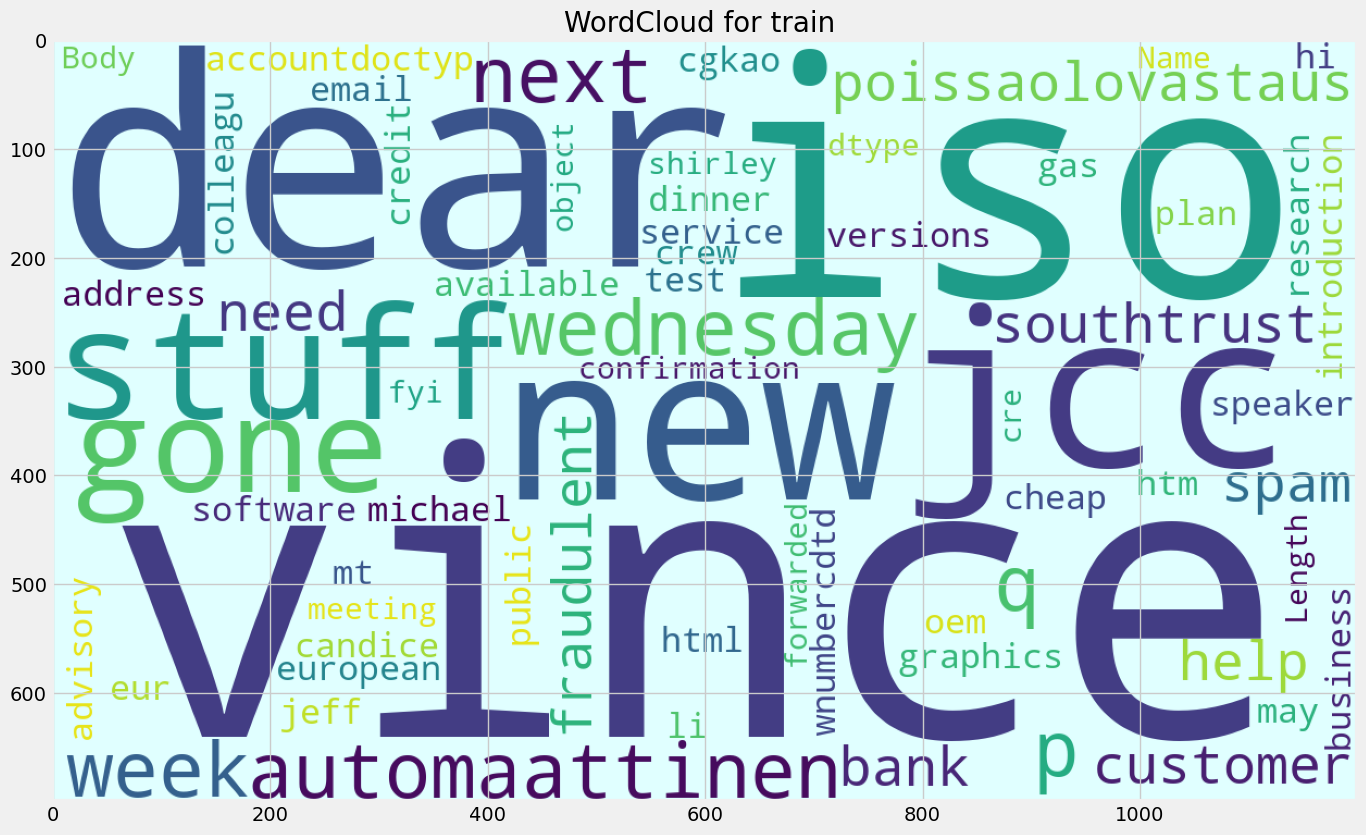

In [18]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

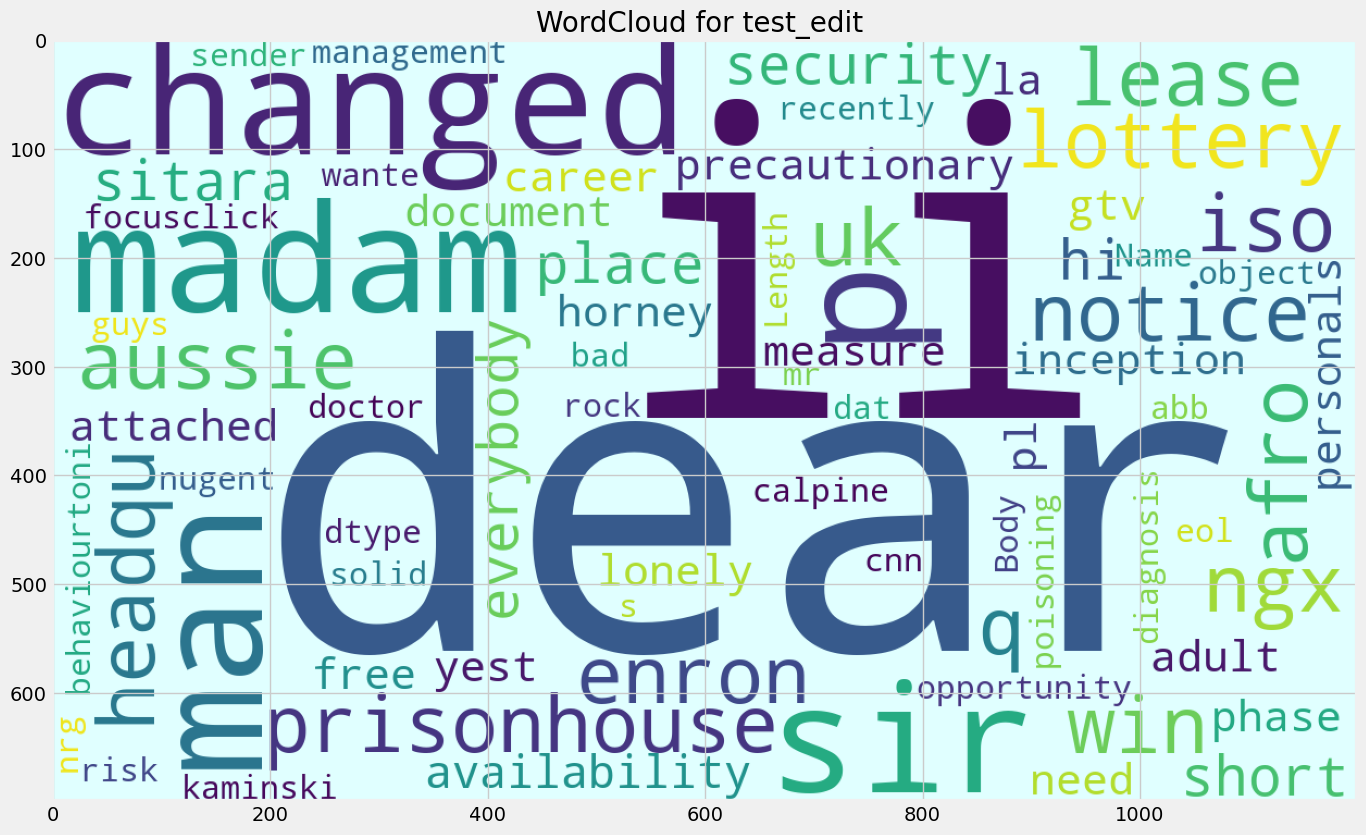

In [19]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test_edit['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for train')

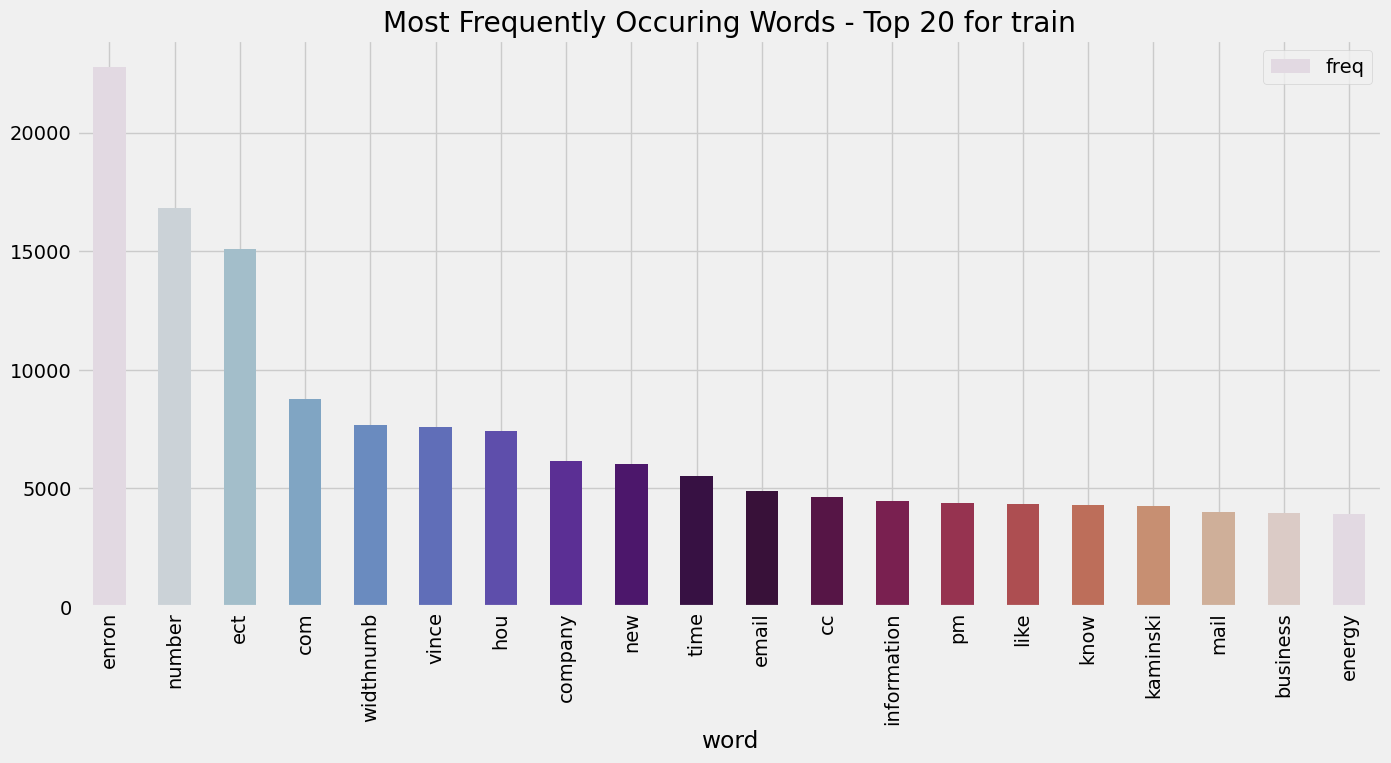

In [21]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for test_edit')

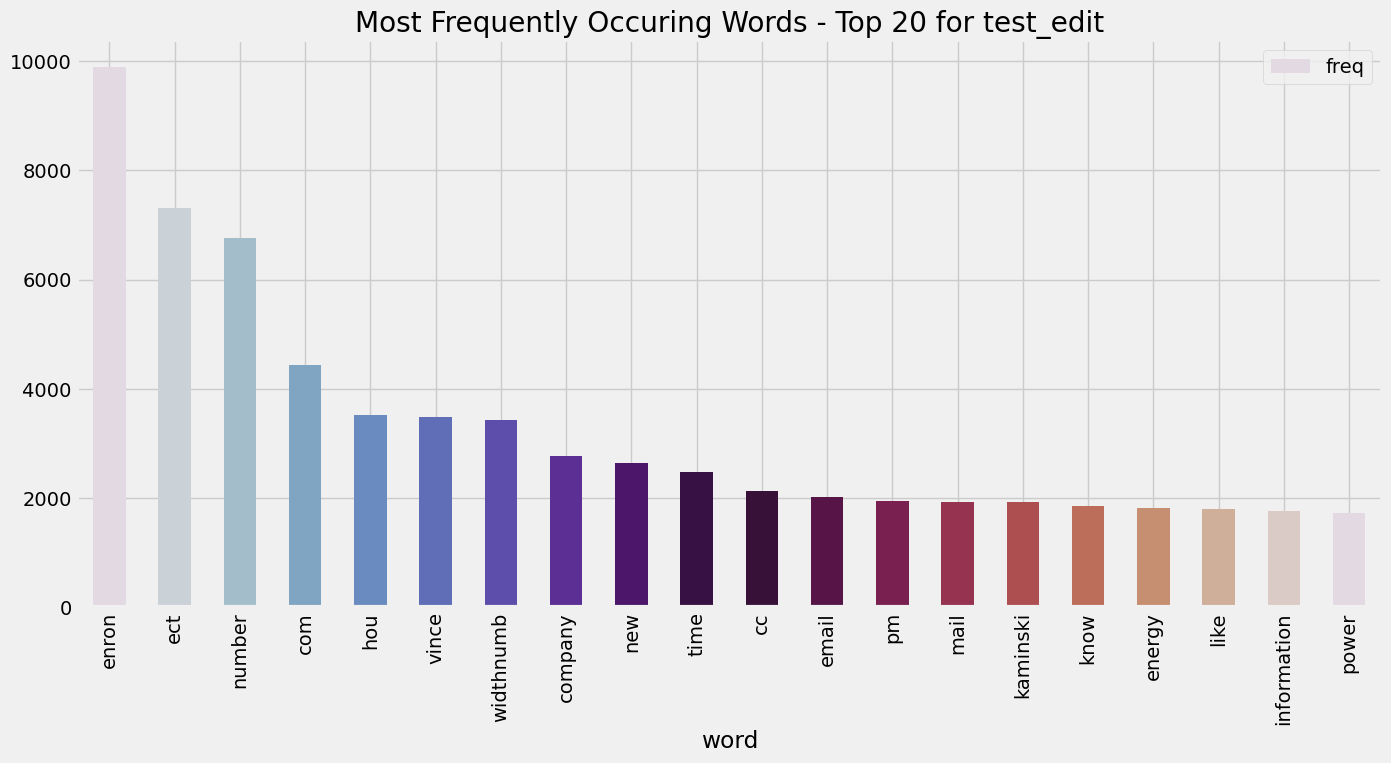

In [22]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for test_edit")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 train')

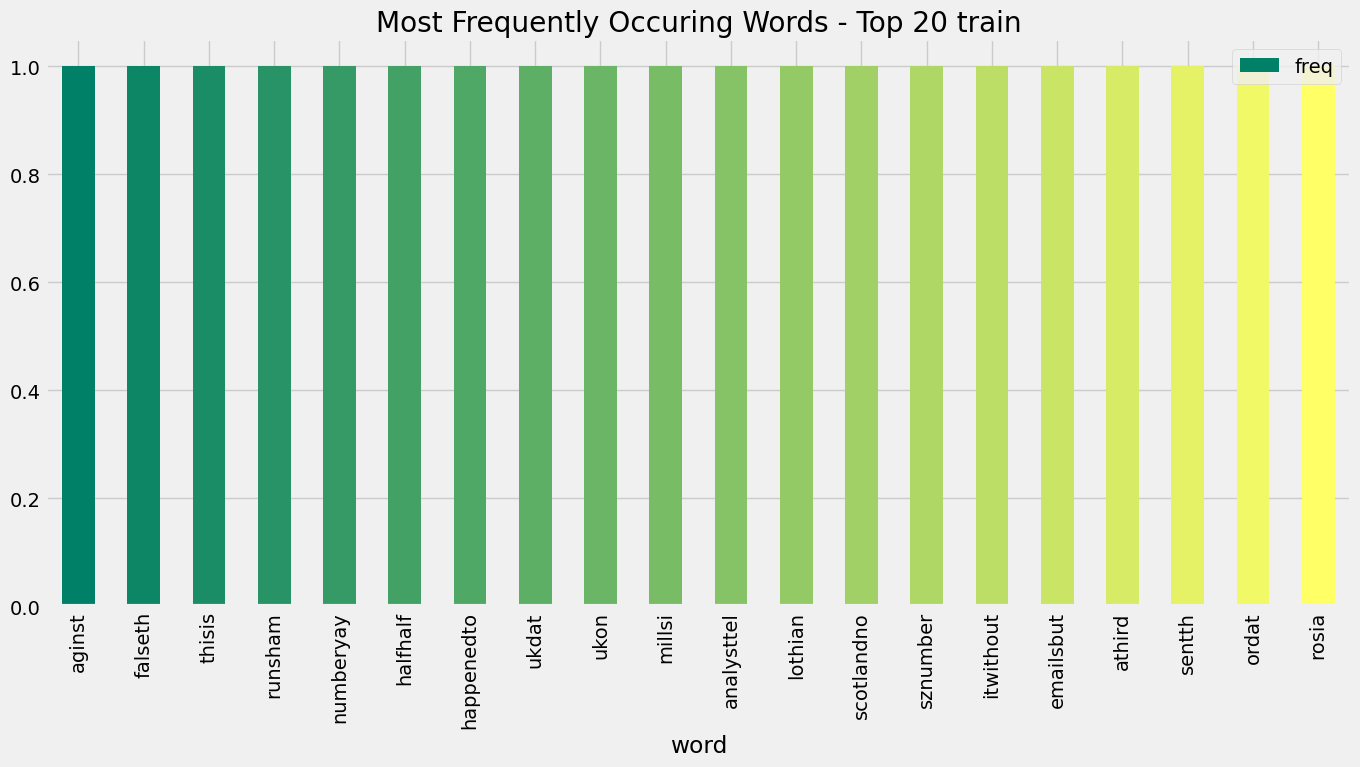

In [23]:

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 test_edit')

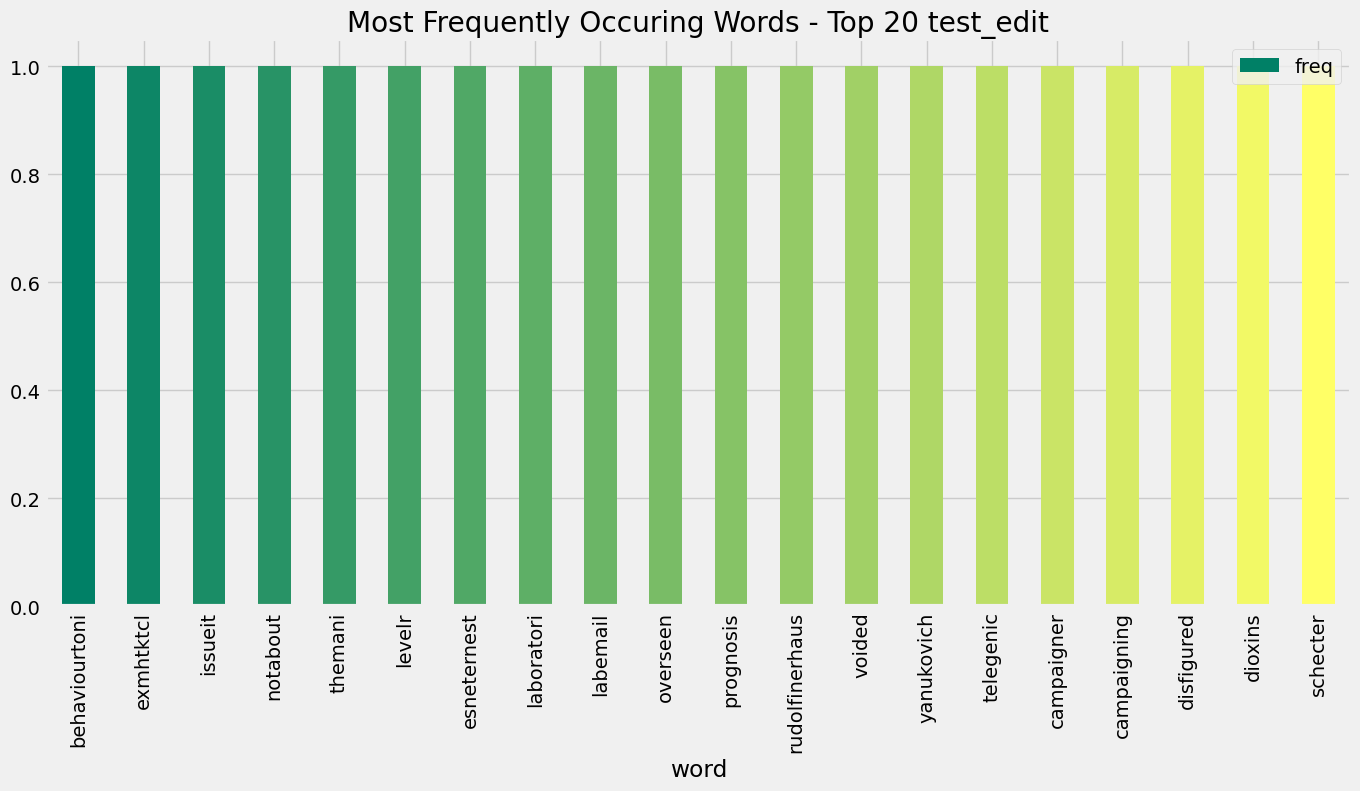

In [24]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 test_edit")